# กระบวนการทำ Data Analytic
0. จุดประสงค์ของการทำ Data Analytic คืออะไร
1. การเก็บข้อมูล/รวบรวมข้อมูลดิบ *
2. การตั้งคำถาม ตั้งสมมติฐาน 
3. การสร้างฐานข้อมูลเพื่อการวิเคราะห์ (Data Mart)
  - การเลือกข้อมูล
  - การจัดรูปแบบข้อมูล
  - การ clean ข้อมูล
4. การหาคำตอบจากข้อมูล ซึ่งอาจจะได้จากขั้นตอนที่ 3 หรือหา insight เพิ่มเติม
5. ระหว่างการหาคำตอบ จะมีคำถามใหม่เกิดขึ้นมา จนอาจจะนำมาสู่กระบวนการย้อนกลับไปสู่ขั้นตอน 1 หรือ 2
6. การสรุปผล 
** 1 กับ 2 อาจจะสลับกัน บางครั้งเราก็ตั้งคำถามก่อนรวมรวมข้อมูล

In [ ]:
# Install libraries
!pip install pygsheets
!pip install pythainlp

     |████████████████████████████████| 153kB 6.0MB/s 
     |████████████████████████████████| 11.0MB 362kB/s 
     |████████████████████████████████| 747kB 44.5MB/s 


In [ ]:
!gdown --id 175HCEziwBcWBffjE9O50q4HivfB8DYE4
!gdown --id 1zT3xZTgWHiiMg5lwtB0iEjcVvFuu4O-7
!gdown --id 14pjXRN_Y3Fmf5VKzMgu_ewReD82J1OKP

Downloading...
From: https://drive.google.com/uc?id=175HCEziwBcWBffjE9O50q4HivfB8DYE4
To: /content/botnoiw2v.py
100% 389/389 [00:00<00:00, 741kB/s]
Downloading...
From: https://drive.google.com/uc?id=1zT3xZTgWHiiMg5lwtB0iEjcVvFuu4O-7
To: /content/botnoiw2v_small.mod
19.0MB [00:00, 21.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=14pjXRN_Y3Fmf5VKzMgu_ewReD82J1OKP
To: /content/TH-Sarabun-New.zip
100% 415k/415k [00:00<00:00, 59.0MB/s]


#0. ตั้งจุดประสงค์ของการวิเคราะห์ข้อมูล
- เข้าใจคนที่เรียน จะได้สอนได้ตรงกับความต้องการ
- จัดแบ่งกลุ่มคนเรียน
- ดูเรื่องของการสมัคร จะได้ปรับปรุงคราวหน้า

# 1. การเก็บข้อมูล
ข้อมูลที่ได้ อาจจะมาจากหลายช่องทาง อาทิ การทำการสำรวจ ระบบการจอง ระบบการซื้อการขาย website แชทบอท social media เป็นต้น

ข้อมูลที่เรานำมาวิเคราะห์ในคลาสนี้ เป็นข้อมูลที่ผู้สมัครกรอกแบบสอบถามบน Google Form ซึ่งมีการบันทึกข้อมูลต่าง ๆ ดังต่อไปนี้
1. **Timestamp** เป็นข้อมูลวัน และ เวลาที่มีการกรอกแบบสอบถาม
2. **สะดวกเรียนช่วงเวลาไหน** ช่วงเวลาที่สะดวกเรียน
3. **อายุ** ช่วงอายุของผู้สมัคร
4. **อาชีพ** อาชีพของผู้สมัคร
5. **สถานที่ทำงาน/เรียน** บริษัท หรือ สถานศึกษา ของผู้สมัคร
6. **สาขาที่เรียนจบ / กำลังศึกษา** สาขาวิชาที่เรียนจบ หรือ สาชาวิชาที่กำลังศึกษาอยู่
7. **มีพื้นฐานการเขียนโปรแกรมคอมพิวเตอร์หรือไม่ หากมีโปรดให้ข้อมูล อาทิ ภาษาที่ถนัด ประสบการณ์ในการเขียน** ความรู้ด้านการเขียนโปรแกรม
8. **ได้ผ่านการเรียนคลาสอื่น ๆ ของ BOTNOI มาก่อนหรือไม่ ถ้าเคยเรียนคลาสไหนมา** เคยผ่านการอบรมกับทาง BOTNOI มาก่อนหรือไม่
9. **ทำไมถึงสนใจสมัครเรียน** เหตุผลที่ผู้สมัครสนใจลงเรียนคตลาสนี้
10. **ความคาดหวังจากการมาเรียน** สิ่งที่ผู้สมัครคาดหวัง เมื่อเรียนจบ
11. **กรุณาช่วยระบุว่าได้รับข่าวคลาสเรียนบอทน้อยจากไหน** ช่องทางที่ผู้สมัครทราบข่าวเกี่ยวกับคลาสเรียน เช่น Line, Facebook หรือ Twitter เป็นต้น
12. **ยืนยันลงทะเบียน** ผู้สมัครได้ทำการยืนยันการลงทะเบียนหรือไม่
13. **ชำระเงิน** สถานะการชำระเงินของผู้สมัคร

In [ ]:
# โค้ดในส่วนของการเชื่อมต่อกับ google sheet
import pygsheets #read googlesheet
import google.auth
from google.colab import auth
import seaborn as sns
import warnings
import pandas as pd
# set maximum row to unlimit
pd.options.display.max_rows = 999
warnings.filterwarnings('ignore')
auth.authenticate_user() #access google
credentials, _ = google.auth.default()
gc = pygsheets.client.Client(credentials)

In [ ]:
#url = 'https://docs.google.com/spreadsheets/d/126tAa47zI6eNwO5UJ3H6s8P-Y1p1wcg82Esiy01X5GY/edit?usp=sharing'
#url = 'https://docs.google.com/spreadsheets/d/1ycAK-7H92CKwxQa-7fqyWHN1Pu2LpFgYWQe-B33LPG8/edit?usp=sharing'
url = 'https://docs.google.com/spreadsheets/d/1JbScOEEU3cShEXOdP_XW9fSuXXofxTybS8C8lfPukB8/edit?usp=sharing'
sheet = gc.open_by_url(url)
# Get data from google sheet
dat = sheet.sheet1.get_as_df()
dat.head()

,Timestamp,สะดวกเรียนช่วงเวลาไหน,อายุ,อาชีพ,สถานที่ทำงาน/เรียน,สาขาที่เรียนจบ / กำลังศึกษา,มีพื้นฐานการเขียนโปรแกรมคอมพิวเตอร์หรือไม่ หากมีโปรดให้ข้อมูล อาทิ ภาษาที่ถนัด ประสบการณ์ในการเขียน,ได้ผ่านการเรียนคลาสอื่น ๆ ของ BOTNOI มาก่อนหรือไม่ ถ้าเคยเรียนคลาสไหนมา,ทำไมถึงสนใจสมัครเรียน,ความคาดหวังจากการมาเรียน,กรุณาช่วยระบุว่าได้รับข่าวคลาสเรียนบอทน้อยจากไหน,,ยืนยันลงทะเบียน,ชำระเงิน,predictgender,predictgender_conf
0,7/22/2020 9:45:56,เสาร์ และ อาทิตย์ 09:00 ถึง 12:00,20 - 30 ปี,Facebook Marketing Specialist,North Star Digital,-,ไม่มี,,ต้องการนำทักษะมาพัฒนา เพิ่ม results ให้ data-d...,ได้มากกว่าทฤษฎี ได้วิธีคิดนำมาใช้ปฏิบัติได้จริง,LINE Botnoi,,,,หญิง,0.506843
1,7/22/2020 9:46:30,จันทร์ ถึง ศุกร์ เวลา 18:00 ถึง 21:00,20 - 30 ปี,-,-,-,-,,-,-,,,,,หญิง,0.808981
2,7/26/2020 13:22:31,เสาร์ และ อาทิตย์ 09:00 ถึง 12:00,15 - 20 ปี,รับจ้างทั่วไป,แผงทุเรียนป๋าติ๊ก-เจ๊เขม,-,ไม่มี,Python Fundamental for Data Science module 1,สามารถนำมาใช้ในการทำงานได้,ได้เรียนรู้เกี่ยวกับระบบเครือข่ายการสื่อสารโทร...,ไลน์,,,,หญิง,0.851083
3,7/26/2020 7:59:33,จันทร์ ถึง ศุกร์ เวลา 10:00 ถึง 18:00,20 - 30 ปี,นักเรียน,SLEC New Zealand,Academic English,ไม่มี,,เคยทำงานกับเอเจนซี่โฆษณา เห็นว่า Python & Data...,สามารถเชื่อมโยงองค์ความรู้และเพิ่มขีดความสามาร...,Bot@Line ”botnoi”,,U5116c065205e2e6c0ce9a458b29960c5,,ชาย,0.766619
4,7/22/2020 9:50:36,เสาร์ และ อาทิตย์ 09:00 ถึง 12:00,20 - 30 ปี,Auditor,Mazars Limited,Accountancy,N/A,,อยากเพิ่มเติมความสามารถและมองหาโอกาสในสายอาชีพ...,Deeply understand Data science foundation and ...,ไลน์,,,,ชาย,0.860125


In [ ]:
# แสดงหัวข้อทั้งหมดของฐานข้อมูล
dat.columns

Index(['Timestamp', 'สะดวกเรียนช่วงเวลาไหน', 'อายุ', 'อาชีพ',
       'สถานที่ทำงาน/เรียน', 'สาขาที่เรียนจบ / กำลังศึกษา',
       'มีพื้นฐานการเขียนโปรแกรมคอมพิวเตอร์หรือไม่ หากมีโปรดให้ข้อมูล อาทิ ภาษาที่ถนัด ประสบการณ์ในการเขียน',
       'ได้ผ่านการเรียนคลาสอื่น ๆ ของ BOTNOI มาก่อนหรือไม่ ถ้าเคยเรียนคลาสไหนมา',
       'ทำไมถึงสนใจสมัครเรียน', 'ความคาดหวังจากการมาเรียน',
       'กรุณาช่วยระบุว่าได้รับข่าวคลาสเรียนบอทน้อยจากไหน', '',
       'ยืนยันลงทะเบียน', 'ชำระเงิน', 'predictgender', 'predictgender_conf'],
      dtype='object')

In [ ]:
# เลือกเฉพาะผู้สมัครที่ชำระค่าลงทะเบียน
#dat['ชำระเงิน']==1
dat = dat[dat['ชำระเงิน']==1]
len(dat)

427

In [ ]:
# นับจำนวนทั้งหมด
len(dat)

427

In [ ]:
# ดูข้อมูลแค่ 5 บรรทัดแรก
dat.head()

,Timestamp,สะดวกเรียนช่วงเวลาไหน,อายุ,อาชีพ,สถานที่ทำงาน/เรียน,สาขาที่เรียนจบ / กำลังศึกษา,มีพื้นฐานการเขียนโปรแกรมคอมพิวเตอร์หรือไม่ หากมีโปรดให้ข้อมูล อาทิ ภาษาที่ถนัด ประสบการณ์ในการเขียน,ได้ผ่านการเรียนคลาสอื่น ๆ ของ BOTNOI มาก่อนหรือไม่ ถ้าเคยเรียนคลาสไหนมา,ทำไมถึงสนใจสมัครเรียน,ความคาดหวังจากการมาเรียน,กรุณาช่วยระบุว่าได้รับข่าวคลาสเรียนบอทน้อยจากไหน,,ยืนยันลงทะเบียน,ชำระเงิน,predictgender,predictgender_conf
6,8/1/2020 23:59:22,จันทร์ ถึง ศุกร์ เวลา 18:00 ถึง 21:00,20 - 30 ปี,Actuary,Muangthai life insurance,Actuarial Science,Python (fundamental),,I recently discovered new-found passion for da...,Being able to conceptualize data science and u...,facebook,,Uf47e849ccce469f7c111bfbd013ae885,1,หญิง,0.667932
7,8/5/2020 2:27:21,จันทร์ ถึง ศุกร์ เวลา 10:00 ถึง 18:00,20 - 30 ปี,Data​ Analyst​,dData,Actuarial​ science​,Python/R​,,อยากรู้ว่าในสายงาน​data​ scientists​ ในงานต่าง...,ขยายมุมมองเกี่ยวกับงานด้าน​ data​,Facebook,,U381d321cbf39240880a3f1e3449d3d13,1,หญิง,0.845253
8,7/20/2020 18:06:09,เสาร์ และ อาทิตย์ 09:00 ถึง 12:00,30 - 40 ปี,Data Analyst,ธนาคาร UOB,"Agricultural Economics, Actuaty and Risk Manag...","SAS 5 ปี, Python 1 ปี",,อยากมีความรู้ที่ตรงตามสายงานจริงๆ มีพื้นฐานที่...,นำความรู้มาใช้ในการทำงานได้จริง สร้างผลงานจากก...,,,Uab276d69a1a1979a3bf028c6a5374abd,1,ชาย,0.720272
9,8/1/2020 22:59:37,เสาร์ และ อาทิตย์ 09:00 ถึง 12:00,30 - 40 ปี,Network enginert,Nexentel,Applied math,Python / 5 ปี,,เปิดโลก,เปิดโลก,Facebook,,U7467bda9e14a113d75d9b86535442981,1,ชาย,0.848806
10,7/22/2020 10:36:41,เสาร์ และ อาทิตย์ 09:00 ถึง 12:00,30 - 40 ปี,digital marketing,Asiasoft,"Apply science, Major industrial physic","มีพื้นฐานอยู่บ้าง ภาษาที่เขียนได้ C, Python พอ...",,ต้องการพัฒนาสกิลด้าน Data Science ให้มากขึ้นแล...,ได้ลงมือทำ Data Science process รวมถึงทำ Advan...,คนรู้จัก,,Ua45dd0b594df8035b616c31f1b40d0d8,1,ชาย,0.518721


# 2. การตั้งคำถาม ตั้งสมมติฐาน ตั้งเป้าหมายของการวิเคราะห์

2.1 ตั้งคำถาม
- เพื่อเตรียมตัวสอน สำหรับคนสอน
  - อยากรู้ว่า expectation ของผู้เรียนเป็นยังไง
  - อยากรู้ว่าทำไมถึงสนใจเรียน
  - อยากรู้พื้นฐานการเขียนโปรแกรม
  - อยากรู้ว่ากลุ่มอายุและเพศ
  - อยากรู้อาชีพ
  - อยากรู้สถานที่เรียน/ทำงาน

- เพื่อเข้าใจการสมัคร สำหรับฝั่ง marketing
  - อยากรู้ว่าสมัครช่องทางไหน
  - อยากรู้ว่ารู้ข่าวจากไหน
  - อยากรู้ช่วงเวลาที่สมัคร

2.2 ตั้งสมมติฐาน
- จะมีคนสมัครเป็นผู้หญิงประมาณ 30%
- มีกลุ่มคนสมัครเป็น เจ้าของธุรกิจ ผู้บริหาร พนักงานบริษัท นักศึกษา

2.3. ตั้งเป้าหมาย
- เพื่อจัดกลุ่มย่อย 20 กรุ๊ป โดยในแต่ละกรุ๊ปจะมีต้องมีความเท่าเทียม นั่นคือมีความหลากหลายของคนในกลุ่ม เช่น มีโปรแกรมเมอร์ มี business มี marketing มีนักศึกษา มีคนทำงาน

#3. การสร้างฐานข้อมูลเพื่อการวิเคราะห์ (Data Mart)
- เพื่อการวิเคราะห์เราต้องมีการจัดข้อมูลให้เหมาะสมสำหรับการนำมาวิเคราะห์

##3.1 ข้อมูลอายุ

In [ ]:
dat.columns

Index(['Timestamp', 'สะดวกเรียนช่วงเวลาไหน', 'อายุ', 'อาชีพ',
       'สถานที่ทำงาน/เรียน', 'สาขาที่เรียนจบ / กำลังศึกษา',
       'มีพื้นฐานการเขียนโปรแกรมคอมพิวเตอร์หรือไม่ หากมีโปรดให้ข้อมูล อาทิ ภาษาที่ถนัด ประสบการณ์ในการเขียน',
       'ได้ผ่านการเรียนคลาสอื่น ๆ ของ BOTNOI มาก่อนหรือไม่ ถ้าเคยเรียนคลาสไหนมา',
       'ทำไมถึงสนใจสมัครเรียน', 'ความคาดหวังจากการมาเรียน',
       'กรุณาช่วยระบุว่าได้รับข่าวคลาสเรียนบอทน้อยจากไหน', '',
       'ยืนยันลงทะเบียน', 'ชำระเงิน', 'predictgender', 'predictgender_conf'],
      dtype='object')

In [ ]:
datage = dat[['อายุ']]
datage.head()

,อายุ
6,20 - 30 ปี
7,20 - 30 ปี
8,30 - 40 ปี
9,30 - 40 ปี
10,30 - 40 ปี


In [ ]:
datage['อายุ'].value_counts()

20 - 30 ปี      212
30 - 40 ปี      136
40 ปี ขึ้นไป     60
15 - 20 ปี       17
9                 1
65ปี              1
Name: อายุ, dtype: int64

In [ ]:
datage = datage.replace('20 - 30 ปี','20-30')
datage = datage.replace('30 - 40 ปี','30-40')
datage = datage.replace('40 ปี ขึ้นไป','>40')
datage = datage.replace('15 - 20 ปี','<20')
datage = datage.replace('65ปี','>40')
datage = datage.replace(9,'<20')
datage.head()

,อายุ
6,20-30
7,20-30
8,30-40
9,30-40
10,30-40


In [ ]:
datage['อายุ'].value_counts()

20-30    212
30-40    136
>40       61
<20       18
Name: อายุ, dtype: int64

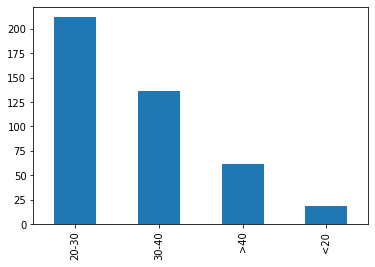

In [ ]:
datage['อายุ'].value_counts().plot.bar()

###สรุปเรื่องอายุ
- ถ้าตอนเก็บข้อมูลถามเป็นอายุ จะได้การวิเคราะห์ที่ดีกว่านี้
- การถามอายุอาจจะส่งผลไม่ดีต่อความรู้สึก อาจจะถามเป็น วันเดือนปีเกิด แทน
- สมมติฐานที่เกิดขึ้นระหว่างการดูข้อมูลคือ กลุ่ม 20-30 ปี เป็นกลุ่มนักศึกษา 30-40 ปี เป็นพนักงานออฟฟิส 40 ปีขึ้นไปเป็นผู้บริหาร

##3.2 ข้อมูลเพศ

In [ ]:
dat['ทำไมถึงสนใจสมัครเรียน'].str.find('ค่ะ')!=-1

6      False
7      False
8      False
9      False
10     False
12     False
13     False
14     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
25     False
26     False
28     False
30     False
31     False
32     False
35     False
37     False
39     False
45     False
48     False
49     False
51     False
52     False
54     False
56     False
57     False
58     False
59     False
62     False
67     False
68     False
69      True
71     False
73     False
74     False
76     False
80     False
81      True
85     False
89     False
91     False
93     False
94     False
95     False
97     False
98     False
99     False
101    False
102    False
106    False
108    False
110    False
111    False
112    False
114    False
116    False
117    False
118    False
119    False
120     True
121    False
122    False
123    False
124    False
125    False
127     True
128    False
129    False
136    False
137    False
138    False

In [ ]:
import numpy as np
def getstringdetect(wordList):
  gres = []
  for c in dat.columns:
    print(c)
    gcol = dat[c].astype('str')
    for w in wordList:
      res = (gcol.str.find(w)!=-1).values
      gres.append(res)
  #return gres
  gres = np.vstack(gres).T.sum(1)
  return gres

In [ ]:
res = getstringdetect(['ค่ะ','คะ','ค่า'])

Timestamp
สะดวกเรียนช่วงเวลาไหน
อายุ
อาชีพ
สถานที่ทำงาน/เรียน
สาขาที่เรียนจบ / กำลังศึกษา
มีพื้นฐานการเขียนโปรแกรมคอมพิวเตอร์หรือไม่ หากมีโปรดให้ข้อมูล อาทิ ภาษาที่ถนัด ประสบการณ์ในการเขียน
ได้ผ่านการเรียนคลาสอื่น ๆ ของ BOTNOI มาก่อนหรือไม่ ถ้าเคยเรียนคลาสไหนมา
ทำไมถึงสนใจสมัครเรียน
ความคาดหวังจากการมาเรียน
กรุณาช่วยระบุว่าได้รับข่าวคลาสเรียนบอทน้อยจากไหน

ยืนยันลงทะเบียน
ชำระเงิน
predictgender
predictgender_conf


In [ ]:
gdat = pd.DataFrame()

gdat['Male'] = getstringdetect(['คับ','ผม','ครับ','ฮะ'])
gdat['Female'] = getstringdetect(['ค่ะ','คะ','จ้า','หนู','ดิฉัน'])
gdat = (gdat>0).astype('int')
gdat['name'] = dat['ชื่อ'].values
gdat

Timestamp
สะดวกเรียนช่วงเวลาไหน
อายุ
อาชีพ
สถานที่ทำงาน/เรียน
สาขาที่เรียนจบ / กำลังศึกษา
มีพื้นฐานการเขียนโปรแกรมคอมพิวเตอร์หรือไม่ หากมีโปรดให้ข้อมูล อาทิ ภาษาที่ถนัด ประสบการณ์ในการเขียน
ได้ผ่านการเรียนคลาสอื่น ๆ ของ BOTNOI มาก่อนหรือไม่ ถ้าเคยเรียนคลาสไหนมา
ทำไมถึงสนใจสมัครเรียน
ความคาดหวังจากการมาเรียน
กรุณาช่วยระบุว่าได้รับข่าวคลาสเรียนบอทน้อยจากไหน

ยืนยันลงทะเบียน
ชำระเงิน
predictgender
predictgender_conf
Timestamp
สะดวกเรียนช่วงเวลาไหน
อายุ
อาชีพ
สถานที่ทำงาน/เรียน
สาขาที่เรียนจบ / กำลังศึกษา
มีพื้นฐานการเขียนโปรแกรมคอมพิวเตอร์หรือไม่ หากมีโปรดให้ข้อมูล อาทิ ภาษาที่ถนัด ประสบการณ์ในการเขียน
ได้ผ่านการเรียนคลาสอื่น ๆ ของ BOTNOI มาก่อนหรือไม่ ถ้าเคยเรียนคลาสไหนมา
ทำไมถึงสนใจสมัครเรียน
ความคาดหวังจากการมาเรียน
กรุณาช่วยระบุว่าได้รับข่าวคลาสเรียนบอทน้อยจากไหน

ยืนยันลงทะเบียน
ชำระเงิน
predictgender
predictgender_conf


KeyError: ignored

In [ ]:
gdat[gdat['Female']==1]

,Male,Female,name
3,0,1,Suphara
5,0,1,ณัฐธิดา
13,0,1,นาย กิติกร
30,0,1,พีรพล
36,0,1,ศศิประภา
38,0,1,วรัทภพ
46,0,1,Maneenoot
89,0,1,Dussadee
100,0,1,ปรียานุช
122,0,1,กมลภัทร


In [ ]:
#เทสว่าทำไม กิติกร ถึงเป็นผู้หญิง เจอคำว่า เจ้าของธุรกิจ keyword ที่เซทไว้ มีคำว่า จ้า จึงตัดออกน่าจะดีกว่า
dat.iloc[13]

Timestamp                                                                                                                          7/16/2020 18:39:03
สะดวกเรียนช่วงเวลาไหน                                                                                               เสาร์ และ อาทิตย์ 09:00 ถึง 12:00
ชื่อ                                                                                                                                       นาย กิติกร
อายุ                                                                                                                                       30 - 40 ปี
อาชีพ                                                                                                                                   เจ้าของธุรกิจ
สถานที่ทำงาน/เรียน                                                                                                                 Yotaka46 Co., Ltd.
สาขาที่เรียนจบ / กำลังศึกษา                                                                         

In [ ]:
gdat = pd.DataFrame()
gdat['Male'] = getstringdetect(['คับ','ผม','ครับ','ฮะ'])
gdat['Female'] = getstringdetect(['ค่ะ','คะ','หนู','ดิฉัน'])
gdat = (gdat>0).astype('int')
gdat['name'] = dat['ชื่อ'].values
gdat[gdat['Female']==1]

Timestamp
สะดวกเรียนช่วงเวลาไหน
อายุ
อาชีพ
สถานที่ทำงาน/เรียน
สาขาที่เรียนจบ / กำลังศึกษา
มีพื้นฐานการเขียนโปรแกรมคอมพิวเตอร์หรือไม่ หากมีโปรดให้ข้อมูล อาทิ ภาษาที่ถนัด ประสบการณ์ในการเขียน
ได้ผ่านการเรียนคลาสอื่น ๆ ของ BOTNOI มาก่อนหรือไม่ ถ้าเคยเรียนคลาสไหนมา
ทำไมถึงสนใจสมัครเรียน
ความคาดหวังจากการมาเรียน
กรุณาช่วยระบุว่าได้รับข่าวคลาสเรียนบอทน้อยจากไหน

ยืนยันลงทะเบียน
ชำระเงิน
predictgender
predictgender_conf
Timestamp
สะดวกเรียนช่วงเวลาไหน
อายุ
อาชีพ
สถานที่ทำงาน/เรียน
สาขาที่เรียนจบ / กำลังศึกษา
มีพื้นฐานการเขียนโปรแกรมคอมพิวเตอร์หรือไม่ หากมีโปรดให้ข้อมูล อาทิ ภาษาที่ถนัด ประสบการณ์ในการเขียน
ได้ผ่านการเรียนคลาสอื่น ๆ ของ BOTNOI มาก่อนหรือไม่ ถ้าเคยเรียนคลาสไหนมา
ทำไมถึงสนใจสมัครเรียน
ความคาดหวังจากการมาเรียน
กรุณาช่วยระบุว่าได้รับข่าวคลาสเรียนบอทน้อยจากไหน

ยืนยันลงทะเบียน
ชำระเงิน
predictgender
predictgender_conf


KeyError: ignored

In [ ]:
gdat[(gdat['Male']==0) & (gdat['Female']==0)]

,Male,Female,name
1,0,0,อุเทน
2,0,0,กฤติธี
4,0,0,ศศิน
6,0,0,สุทธิรักษ์
7,0,0,Pikul
8,0,0,ธนภัทร
9,0,0,Nattachai
11,0,0,จินต์จุฑา
12,0,0,วัลลภิศร์
13,0,0,นาย กิติกร


In [ ]:
ndat = dat[['predictgender']]
ndat = ndat.replace('ชาย','male')
ndat = ndat.replace('หญิง','female')

Index(['Timestamp', 'สะดวกเรียนช่วงเวลาไหน', 'อายุ', 'อาชีพ',
       'สถานที่ทำงาน/เรียน', 'สาขาที่เรียนจบ / กำลังศึกษา',
       'มีพื้นฐานการเขียนโปรแกรมคอมพิวเตอร์หรือไม่ หากมีโปรดให้ข้อมูล อาทิ ภาษาที่ถนัด ประสบการณ์ในการเขียน',
       'ได้ผ่านการเรียนคลาสอื่น ๆ ของ BOTNOI มาก่อนหรือไม่ ถ้าเคยเรียนคลาสไหนมา',
       'ทำไมถึงสนใจสมัครเรียน', 'ความคาดหวังจากการมาเรียน',
       'กรุณาช่วยระบุว่าได้รับข่าวคลาสเรียนบอทน้อยจากไหน', '',
       'ยืนยันลงทะเบียน', 'ชำระเงิน', 'predictgender', 'predictgender_conf'],
      dtype='object')

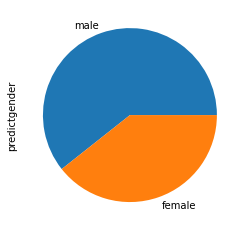

In [ ]:
ndat['predictgender'].value_counts().plot.bar(0)

In [ ]:
ndat[ndat['predictgender']=='หญิง']

,ชื่อ,predictgender


In [ ]:
import requests
token = 'get token from botnoiopenapi.ai'
def getnamegender(name):
  url = "https://openapi.botnoi.ai/service-api/bn_nameapi?name=%s"%name
  headers = {
      'Authorization': 'Bearer %s'%token
  }
  response = requests.request("GET", url, headers=headers)
  return response.json()

In [ ]:
time getnamegender('สมหมาย')

CPU times: user 16.5 ms, sys: 4.91 ms, total: 21.4 ms
Wall time: 552 ms


{'message': 'Bad token; invalid JSON'}

In [ ]:
getnamegender('ญาญ่า')

{'message': 'Bad token; invalid JSON'}

##3.2 ข้อมูลการเขียนโปรแกรม

In [ ]:
# แสดงข้อมูลของพื้นฐานการเขียนโปรแกรม
pskill = dat[['มีพื้นฐานการเขียนโปรแกรมคอมพิวเตอร์หรือไม่ หากมีโปรดให้ข้อมูล อาทิ ภาษาที่ถนัด ประสบการณ์ในการเขียน']]
# กำหนดชื่อคอลัมน์
pskill.columns = ['programming']
pskill

,programming
0,C# html jquery javascript etc.
1,"C , Python"
2,python
3,Excel : การเขียนสูตรระดับน่าจะประมาณ Intermedi...
4,"มี Javascript, Python"
5,Python
6,ไม่มี
7,PYTHON
8,Python เป็นภาษาที่ใช้เรียนในช่วงมหาวิทยาลัยและ...
9,python ใช้วิเคราะห์ข้อมูล ทำmachine learning m...


- ข้อมูลเป็น free text ไม่ใช่เป็นหัวข้อ ดังนั้นเราต้องทำให้ข้อมูลเป็นหัวข้อ category หรือตัวเลข numeric เพื่อใช้ในการวิเคราะห์
- อยากแยกกลุ่มคนที่เขียนโปรแกรมได้ กับไม่ได้
- อยากได้ข้อมูลของคนที่เขียน Python ได้ เพราะเป็นภาษาหลัก
- อยากได้ข้อมูลของคนที่เขียน R ได้ เพราะเป็นอีกภาษาที่แสดงถึงว่า น่าจะมีพื้นฐานการวิเคราะห์
- อยากได้ข้อมูลของคนที่เขียน Go ได้ เพราะน่าจะเป็น hardcore
- อยากจัดระดับความสามารถ
- สำหรับคนที่เขียนโปรแกรมได้ อยากจะแยกกลุ่มเป็น fullstack frontend backend โดยดูจากภาษาที่ใช้


In [ ]:
# หาคนที่ไม่มีพื้นฐานการเขียนโปรแกรม โดยใช้สมมติฐานว่า มีค่าว่า 'ไม่มี'
noprogrammingskill = pskill['programming'].str.lower().str.contains('ไม่')
noprogrammingskill.sum()

88

In [ ]:
# คนที่เหลือคือมีพื้นฐานในการเขียนโปรแกรม
programmingskill = ~noprogrammingskill
programmingskill.sum()

338

In [ ]:
# หาคนที่มีพื้นฐานการเขียน Python โดยใช้สมมติฐานว่า มีคำว่า python อยู่
pythonskill = pskill['programming'].str.lower().str.contains('python')
pythonskill.sum()

209

In [ ]:
# สมมติฐานเขียนเยอะน่าจะเก่ง
lenskill = pskill['programming'].str.len()

In [ ]:
# ดูสมมติฐานเบื้องต้น แต่ผลลัพธ์ไม่ค่อยดี เพราะบางคนบรรยายเยอะ
plenskill = pskill.copy()
plenskill['lenskill'] = lenskill
plenskill = plenskill.sort_values(by='lenskill',ascending=False)
plenskill

,programming,lenskill
3,Excel : การเขียนสูตรระดับน่าจะประมาณ Intermedi...,391
377,มีพื้นฐานการเขียนจากการเรียนในมหาวิทยาลัยอย่าง...,380
109,ภาษา C/C++ สามารถเขียนได้เบื้องต้น มีการใช้ในก...,371
54,"มีพื้นฐานมาบ้างในภาษา Python, C# และเขียนโปรแก...",343
388,เขียน Python ได้บ้าง และ Shell script ก็ได้อีก...,321
80,มีพื้นฐานการเขียนโปรแกรม Python และ R มาบ้างเล...,299
641,มีพื้นฐานการเขียน Python จากการศึกษาด้วยตนเอง ...,242
581,โปรเจคจบ : ระบบตัดแยกคำร้องอัตโนมัติเพื่องานสา...,180
123,สามารถเขียน python ได้ และมีประสบการณ์เรียน แล...,159
215,"VBA Excel, VB Express, Python 3 >>> เขียน scri...",153


In [ ]:
nplen = pskill['programming'].str.replace(',','').str.replace('#','').str.extract('([a-zA-Z ]+)')[0].str.lower().str.len()
npskill = pskill.copy()
npskill['nskill'] = nplen
npskill = npskill.fillna(0)
npskill.sort_values(by='nskill',ascending=False)

,programming,nskill
711,"R programming, rapidminer, basic python, basic...",63.0
506,Basic Python programming learning from university,49.0
672,"Python, Java, Go, Angular, JavaScript, C, etc.",39.0
378,"Python, Excel VBA, HTML, JavaScript",32.0
332,"C#, Javascript, Python, Labview, C++ ประสบการณ...",29.0
215,"VBA Excel, VB Express, Python 3 >>> เขียน scri...",28.0
0,C# html jquery javascript etc.,28.0
207,"Java ,JavaScript ,php , html",25.0
27,"Java , Javascript , Python",24.0
50,"Python, Pyspark, SQL, Shell",24.0


In [ ]:
plist = pskill['programming'].str.replace(',','').str.replace('#','').str.extract('([a-zA-Z ]+)')[0].str.lower().values
plist[0]

'c html jquery javascript etc'

In [ ]:
plist[0].split(' ')

['c', 'html', 'jquery', 'javascript', 'etc']

In [ ]:
splist = []
for p in plist:
  splist = splist + str(p).strip().split(' ')
splist

['c',
 'html',
 'jquery',
 'javascript',
 'etc',
 'c',
 '',
 'python',
 'python',
 'excel',
 'javascript',
 'python',
 'python',
 'nan',
 'python',
 'python',
 'python',
 'python',
 'pythonsql',
 'java',
 '',
 'php',
 'python',
 'objective',
 'c',
 'vuejs',
 'python',
 'sql',
 'python',
 'advanced',
 'excel',
 'python',
 'python',
 'python',
 'nan',
 'java',
 '',
 'javascript',
 '',
 'python',
 'python',
 'r',
 'sql',
 'java',
 'python',
 'c',
 'python',
 'python',
 'python',
 'c',
 'nan',
 'matlab',
 'python',
 'python',
 'rpython',
 'basic',
 'python',
 'nan',
 'python',
 'pyspark',
 'sql',
 'shell',
 'python',
 'c',
 'basic',
 'python',
 'c',
 'lython',
 'nan',
 'php',
 'javascript',
 'python',
 'python',
 'sql',
 'python',
 '',
 'sql',
 '',
 'htmlcss',
 'sql',
 '',
 'python',
 'c',
 'java',
 'js',
 'sql',
 'python',
 'r',
 'python',
 'php',
 'python',
 'c',
 'python',
 'python',
 'python',
 'python',
 'python',
 'r',
 'bash',
 'sql',
 'python',
 'sql',
 'python',
 '',
 'sql',
 'and

In [ ]:
from collections import Counter, OrderedDict
pdict=Counter(splist)
OrderedDict(pdict.most_common())

OrderedDict([('python', 162),
             ('nan', 75),
             ('c', 71),
             ('sql', 51),
             ('', 49),
             ('java', 29),
             ('r', 23),
             ('php', 21),
             ('javascript', 18),
             ('vb', 15),
             ('basic', 14),
             ('html', 11),
             ('vba', 9),
             ('excel', 7),
             ('no', 7),
             ('js', 5),
             ('programming', 4),
             ('and', 3),
             ('nodejs', 3),
             ('none', 3),
             ('beginner', 3),
             ('css', 3),
             ('stata', 3),
             ('etc', 2),
             ('matlab', 2),
             ('shell', 2),
             ('abap', 2),
             ('language', 2),
             ('sas', 2),
             ('script', 2),
             ('visual', 2),
             ('node', 2),
             ('based', 2),
             ('learning', 2),
             ('of', 2),
             ('jquery', 1),
             ('pythonsql', 1),
    

In [ ]:
frontendproglist = ['javascript','vuejs','nodejs','html','js','jquery','web','angular','react','css','htmlcss','php']
backendproglist = ['python','go','c','java']
dataproglist = ['r','cognos','sql','vba','matlab','pyspark','rapidminer']
pythonproglist = ['python']

In [ ]:
spu = set(plist[0].split(' '))
set(plist[0].split(' '))

{'c', 'etc', 'html', 'javascript', 'jquery'}

In [ ]:
spu.intersection(frontendproglist)

{'html', 'javascript', 'jquery'}

In [ ]:
len(spu.intersection(frontendproglist))

3

In [ ]:
def getprogprofile(plist):
  frontendproglist = ['javascript','vuejs','nodejs','html','js','jquery','web','angular','react','css','htmlcss','php']
  backendproglist = ['python','go','c','java']
  dataproglist = ['r','cognos','sql','vba','matlab','pyspark','rapidminer','excel']
  pythonproglist = ['python']
  pprofile = []
  for p in plist:
    spu = set(str(p).split(' '))
    fp = len(spu.intersection(frontendproglist))
    bp = len(spu.intersection(backendproglist))
    dp = len(spu.intersection(dataproglist))
    pp = len(spu.intersection(pythonproglist))
    pprofile.append([fp,bp,dp,pp])
  return pprofile

In [ ]:
pprofile = getprogprofile(plist)
pprofile = pd.DataFrame(data=pprofile,columns=['frontend','backend','data','python'])
pprofile.head()

,frontend,backend,data,python
0,3,1,0,0
1,0,2,0,1
2,0,1,0,1
3,0,0,1,0
4,1,1,0,1


In [ ]:
plist[3]

'excel '

In [ ]:
# แบ่ง cluster ของกลุ่มความสามารถในการเขียนโปรแกรม ด้วย K-means
from sklearn.cluster import KMeans
clus = KMeans(n_clusters=6, random_state=0).fit_predict(pprofile)
pprofile['prog_clus'] = clus
pprofile

,frontend,backend,data,python,prog_clus
0,3,1,0,0,3
1,0,2,0,1,5
2,0,1,0,1,0
3,0,0,1,0,4
4,1,1,0,1,0
5,0,1,0,1,0
6,0,0,0,0,1
7,0,1,0,1,0
8,0,1,0,1,0
9,0,1,0,1,0


In [ ]:
pprofile.groupby(by='prog_clus').mean()

,frontend,backend,data,python
prog_clus,,,,
0,0.061538,1.000000,0.192308,1.000000
1,0.051613,0.000000,0.000000,0.000000
2,0.127273,1.072727,0.000000,0.000000
3,2.428571,0.714286,0.214286,0.357143
4,0.040000,0.140000,1.280000,0.100000
5,0.363636,2.227273,0.136364,1.000000


In [ ]:
pprofile['prog_clus'] = pprofile['prog_clus'].replace(0,'p_python')
pprofile['prog_clus'] = pprofile['prog_clus'].replace(1,'p_noskill')
pprofile['prog_clus'] = pprofile['prog_clus'].replace(2,'p_frontend')
pprofile['prog_clus'] = pprofile['prog_clus'].replace(3,'p_frontend')
pprofile['prog_clus'] = pprofile['prog_clus'].replace(4,'p_fullstack')
pprofile['prog_clus'] = pprofile['prog_clus'].replace(5,'p_data')
pprofile

,frontend,backend,data,python,prog_clus
0,3,1,0,0,p_backend
1,0,2,0,1,p_data
2,0,1,0,1,p_noskill
3,0,0,1,0,p_fullstack
4,1,1,0,1,p_noskill
5,0,1,0,1,p_noskill
6,0,0,0,0,p_python
7,0,1,0,1,p_noskill
8,0,1,0,1,p_noskill
9,0,1,0,1,p_noskill


In [ ]:
pprofile['prog_clus'].value_counts()

p_python       155
p_noskill      130
p_frontend      55
p_fullstack     50
p_data          22
p_backend       14
Name: prog_clus, dtype: int64

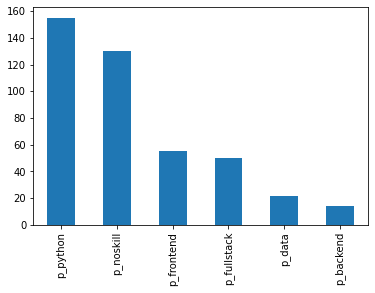

In [ ]:
pprofile['prog_clus'].value_counts().plot.bar()

###สรุปเรื่อง programming
- มีกลุ่มคนที่ไม่มีพื้นฐานการเขียนโปรแกรม
- มีกลุ่มคนที่มีพื้นฐานการเขียน python
- พอจะสรุปได้หรือเปล่าว่า python เป็นภาษายอดนิยมสำหรับคนที่สนใจ data science หรือเกิดจาก bias เพราะเราสอนโดยใช้ colab

##3.3 ความคาดหวัง



In [ ]:
# ดึงข้อมูลเกี่ยวกับความคาดหวังที่นักเรียนกรอกในแบบสอบถาม
expec = dat[['ความคาดหวังจากการมาเรียน']]
expec

,ความคาดหวังจากการมาเรียน
0,ทำระบบ recommendation system ได้ และต่อยอดในด้...
1,ประยุกต์กับชีวิตและการทำงานได้ การตัดสินใจมีพื...
2,Case study / real world application
3,- เขียน Program ได้ดียิ่งขึ้น + รู้ว่า ณ Stage...
4,เข้าใจหลักการ Data science มากขึ้น คิด Analyti...
5,ได้ประสบการณ์ใหม่ๆและได้ลองทำงานจริง
6,สามารถนำความรู้มาพัฒนาการทำงานได้
7,สามารถนำไปใช้งานจริงได้
8,ได้รับความรู้เพิ่มเติมและได้ลองปฏิบัติจริง
9,มีความมั่นใจในการลงมือทำ machine learning proj...


In [ ]:
import botnoiw2v as bw
import numpy as np
#bw.sentencevector('youtube')
expecDat = np.vstack([bw.sentencevector(e) for e in expec['ความคาดหวังจากการมาเรียน'].values])
expecDat

array([[-1.24956322,  0.15185937, -0.00411755, ..., -0.21486473,
        -0.162743  ,  0.4160614 ],
       [-1.52432668,  0.46932563,  0.41572517, ..., -0.26738614,
        -0.68045902,  0.67800194],
       [ 0.13168415, -1.91579318,  0.23483583, ...,  0.50775236,
         0.78831053, -0.15640858],
       ...,
       [-1.98617351,  0.57770145,  0.8240186 , ..., -0.39987871,
        -0.08654923,  0.38569438],
       [-2.06027365, -0.25948718,  1.05954874, ..., -1.01362014,
        -0.44738972,  0.07191944],
       [-1.57155478, -1.01996446,  0.10354207, ..., -0.81412697,
         0.28973868,  0.28456461]])

In [ ]:
# แบ่งกลุ่มความคาดหวังด้วย K-means
eclus = KMeans(n_clusters=4, random_state=0).fit_predict(expecDat)
expec['eclus'] = eclus
expec

,ความคาดหวังจากการมาเรียน,eclus
0,ทำระบบ recommendation system ได้ และต่อยอดในด้...,0
1,ประยุกต์กับชีวิตและการทำงานได้ การตัดสินใจมีพื...,2
2,Case study / real world application,1
3,- เขียน Program ได้ดียิ่งขึ้น + รู้ว่า ณ Stage...,0
4,เข้าใจหลักการ Data science มากขึ้น คิด Analyti...,3
5,ได้ประสบการณ์ใหม่ๆและได้ลองทำงานจริง,3
6,สามารถนำความรู้มาพัฒนาการทำงานได้,2
7,สามารถนำไปใช้งานจริงได้,3
8,ได้รับความรู้เพิ่มเติมและได้ลองปฏิบัติจริง,2
9,มีความมั่นใจในการลงมือทำ machine learning proj...,0


In [ ]:
# แสดงข้อความใน cluster = 0
expec[expec['eclus']==0]

,ความคาดหวังจากการมาเรียน,eclus
0,ทำระบบ recommendation system ได้ และต่อยอดในด้...,0
3,- เขียน Program ได้ดียิ่งขึ้น + รู้ว่า ณ Stage...,0
9,มีความมั่นใจในการลงมือทำ machine learning proj...,0
13,อยากได้ guideline การทำงานแบบมืออาชีพ การทำงาน...,0
14,นำความรู้ที่ได้ไปต่อยอดสรุปและค้นหา paper เกี่...,0
20,ต้องการนำความรู้ที่ได้มาพัฒนาส่วนต่างๆ ตามที่ไ...,0
29,สมารถใช้python ได้พอๆกับ R เพื่อที่จะได้เข้าใจ...,0
33,คาดหวังจะนำความรู้ด้าน AI และ ML ไปช่วยงานในทีม,0
43,อยากลงมือทำโปรเจ็คเล็กๆ และ ได้เข้ามาในคอมมูนิ...,0
44,ไดรับความรู้จากประสบการณ์จริงของทีมงาน BOTNOI,0


In [ ]:
# แสดงข้อความใน cluster = 1
expec[expec['eclus']==1]

,ความคาดหวังจากการมาเรียน,eclus
2,Case study / real world application,1
71,"ai,machine",1
103,Able to apply in real applications,1
125,"Connection,experience",1
131,broaden the scope of the knowledge and data an...,1
134,Actually I'm unemployment that there is some o...,1
147,Cover all the basics to build on in the future,1
228,Up skill.,1
288,understand the concept and can apply the knowl...,1
314,The best Data Scientist,1


In [ ]:
# แสดงข้อความใน cluster = 2
expec[expec['eclus']==2]

,ความคาดหวังจากการมาเรียน,eclus
1,ประยุกต์กับชีวิตและการทำงานได้ การตัดสินใจมีพื...,2
6,สามารถนำความรู้มาพัฒนาการทำงานได้,2
8,ได้รับความรู้เพิ่มเติมและได้ลองปฏิบัติจริง,2
15,สามารถนำความรู้ที่ได้รับไปใช้ในงานและโครงการได้,2
16,สามารถนำไปประยุกต์ในงานต่างๆได้,2
21,สามารถเข้าใจ concept และสามารถนำมาประยุกต์ในงา...,2
22,สามารถนำมาประยุกต์ใช้ได้,2
30,ได้ความรู้เพิ่มเติมจากองค์ความรู้เดิม,2
31,ได้ความรู้มากขึ้น,2
36,ได้รับความรู้ที่ใช้งานได้จริง ได้รับคำแนะนำจาก...,2


In [ ]:
# แสดงข้อความใน cluster = 3
expec[expec['eclus']==3]

,ความคาดหวังจากการมาเรียน,eclus
4,เข้าใจหลักการ Data science มากขึ้น คิด Analyti...,3
5,ได้ประสบการณ์ใหม่ๆและได้ลองทำงานจริง,3
7,สามารถนำไปใช้งานจริงได้,3
17,อยากเรียนรู้เกี่ยวกับ Concept เพื่อเป็นพื้นฐาน...,3
18,สามารถทำโปรเจคเองแบบ mini ได้,3
23,สามารถต่อยอดเพื่อทำ portfolio\n ละนำไปสมัครงานได้,3
27,ได้พัฒนาทักษะและความรู้ไปถึงระดับทำงานจริงได้ครับ,3
28,เนื่องจากเป็นการดำเนินการเรียนการสอนผ่านผู้มีป...,3
32,นำไปประยุกตืใช้งานได้,3
35,คาดหวังในการนำความรู้ไปใช้ทำงานได้จริง,3


In [ ]:
#'expect_apply','expect_experience','expect_concept','expect_english'
expec['eclus'] = expec['eclus'].replace(0,'expect_apply')
expec['eclus'] = expec['eclus'].replace(1,'expect_experience')
expec['eclus'] = expec['eclus'].replace(2,'expect_concept')
expec['eclus'] = expec['eclus'].replace(3,'expect_english')
expec

,ความคาดหวังจากการมาเรียน,eclus
0,ทำระบบ recommendation system ได้ และต่อยอดในด้...,expect_apply
1,ประยุกต์กับชีวิตและการทำงานได้ การตัดสินใจมีพื...,expect_concept
2,Case study / real world application,expect_experience
3,- เขียน Program ได้ดียิ่งขึ้น + รู้ว่า ณ Stage...,expect_apply
4,เข้าใจหลักการ Data science มากขึ้น คิด Analyti...,expect_english
5,ได้ประสบการณ์ใหม่ๆและได้ลองทำงานจริง,expect_english
6,สามารถนำความรู้มาพัฒนาการทำงานได้,expect_concept
7,สามารถนำไปใช้งานจริงได้,expect_english
8,ได้รับความรู้เพิ่มเติมและได้ลองปฏิบัติจริง,expect_concept
9,มีความมั่นใจในการลงมือทำ machine learning proj...,expect_apply


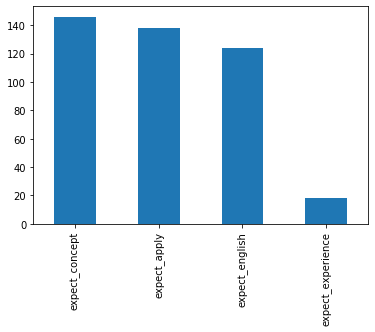

In [ ]:
expec['eclus'].value_counts().plot.bar()

###สรุปเรื่อง ความคาดหวัง
- แบ่งเป็น 3 กลุ่ม 
1.   กลุ่มที่อยากประยุกต์ใช้งาน คาดว่าน่าจะเป็น programmer หรืออยู่สาย data
2.   กลุ่มที่อยากฟังประสบการณ์ คาดว่าน่าจะเป็น data analyst/scientist ที่อยากฟังประสบการณ์เพื่อให้เก่งขึ้น
3.   กลุ่มที่อยากได้ concept คาดว่าน่าจะเป็นบุคคลทั่วไปที่สนใจ อาจจะเป็นนักศึกษา หรือผู้บริหาร ที่อยากเข้าใจว่า data science คืออะไร

In [ ]:
# แปลง cluster ให้เป็น One-hot
expectdf = pd.get_dummies(expec['eclus'])
expectdf.columns = ['expect_apply','expect_experience','expect_concept','expect_english']
expectdf.describe()

,expect_apply,expect_experience,expect_concept,expect_english
count,426.000000,426.000000,426.000000,426.000000
mean,0.323944,0.342723,0.291080,0.042254
std,0.468529,0.475178,0.454794,0.201404
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


##3.4 ทำไมถึงมาเรียน

In [ ]:
studyreason = dat[['ทำไมถึงสนใจสมัครเรียน']]
studyreason

,ทำไมถึงสนใจสมัครเรียน
0,ต้องเรียนต่อ ป โทครับ และสนใจด้าน recommendati...
1,สนใจเพราะต้องการปรับตัวให้เข้ากับอนาคตได้
2,หาความรู้เพิ่มเติม
3,เราสนใจด้าน Behavioral Science ค่ะ \n \n เคยทำ...
4,อยากศึกษาเพิ่มเติมการใช้งานข้อมูลที่โรงงานเก้บ...
5,สนใจDatascience อยากฝึกฝนตัวเองมาขึ้น อยากได้ล...
6,พัฒนาการทำงาน
7,สนใจการทำsegmentation
8,มีความสนใจในเรื่องของสถิติและ data science และ...
9,เดิมพอจะมีพื้นฐานด้านสถิติ และทฤษฎีด้าน machin...


In [ ]:
from sklearn.preprocessing import normalize
reasonDat = np.vstack([bw.sentencevector(s) for s in studyreason['ทำไมถึงสนใจสมัครเรียน'].values])
reasonDat

array([[-0.83664   ,  0.0739858 ,  0.21604526, ..., -0.353679  ,
        -0.11140759,  0.37250158],
       [-1.14248157,  0.612293  , -0.71710134, ...,  0.77828181,
        -1.47446215,  0.59913671],
       [-0.26913008,  1.03678143,  1.64921856, ..., -1.7482785 ,
        -1.32029092, -0.56806368],
       ...,
       [-0.23018834, -1.10907495, -0.45901659, ..., -1.1910212 ,
        -1.8621974 , -0.08223975],
       [-2.12208724,  0.20919302,  0.13486071, ...,  0.11656763,
        -0.52174318,  0.02196929],
       [-0.78592104, -0.79223335,  0.55146223, ..., -0.40660951,
         0.15115172,  0.11079629]])

In [ ]:
rclus = KMeans(n_clusters=3, random_state=0).fit_predict(reasonDat)
studyreason['rclus'] = rclus
studyreason

,ทำไมถึงสนใจสมัครเรียน,rclus
0,ต้องเรียนต่อ ป โทครับ และสนใจด้าน recommendati...,1
1,สนใจเพราะต้องการปรับตัวให้เข้ากับอนาคตได้,2
2,หาความรู้เพิ่มเติม,0
3,เราสนใจด้าน Behavioral Science ค่ะ \n \n เคยทำ...,1
4,อยากศึกษาเพิ่มเติมการใช้งานข้อมูลที่โรงงานเก้บ...,2
5,สนใจDatascience อยากฝึกฝนตัวเองมาขึ้น อยากได้ล...,2
6,พัฒนาการทำงาน,0
7,สนใจการทำsegmentation,0
8,มีความสนใจในเรื่องของสถิติและ data science และ...,0
9,เดิมพอจะมีพื้นฐานด้านสถิติ และทฤษฎีด้าน machin...,0


In [ ]:
studyreason[studyreason['rclus']==0]['ทำไมถึงสนใจสมัครเรียน'].values

array(['หาความรู้เพิ่มเติม', 'พัฒนาการทำงาน', 'สนใจการทำsegmentation',
       'มีความสนใจในเรื่องของสถิติและ data science และได้ลองศึกษาจากการเรียนผ่านสื่อออนไลน์แล้วรู้สึกว่าเป็นงานที่น่าสนใจ จึงอยากเรียนรู้เพิ่มเติมกับทาง BOTNOI เพราะต้องการเรียนกับผู้ที่มีประสบการณ์ทำงานในประเทศและลองปฏิบัติจริงเพื่อให้สิ่งที่เรียนมาเป็นรูปธรรมมากขึ้นและเป็นแนวทางในการเลือกสายงานหลังเรียนจบ',
       'เดิมพอจะมีพื้นฐานด้านสถิติ และทฤษฎีด้าน machine learning บ้างแล้ว แต่ไม่ค่อยได้ทำProject เนื่องจากไม่ค่อยมั่นใจในขั้นตอน หรือการเลือกใช้เครื่องมือที่เหมาะสม',
       'เห็นประกาศคอร์สสอนเกี่ยวกัย data science ของ botnoi มาหลายครั้งและ botnoi ก็ให้โอกาสนักเรียนในทุกระดับช้ันมาเข้าศึกษาได้ จึงสนใจที่จะลองสมัครเรียนดูสักครั้ง เนื่องจากไม่มีประสบการณ์การทำงานทางด้าน data มาก่อนจึงอยากจะศึกษาหาความรู้เพิ่มเติมทางด้าน data anlytics จากนอกมหาวิทยาลัยเพื่อค้นหามุมมองใหม่ๆและการประยุกต์ใช้ใน business จริงๆ แล้วนำความรู้ที่ได้ไปต่อยอดคิด idea ใหม่เพื่อค้นหาแนวทางในการทำ IS หรือค้นหางานในอนาคตในสายงาน data',
      

In [ ]:
studyreason[studyreason['rclus']==1]['ทำไมถึงสนใจสมัครเรียน'].values

array(['ต้องเรียนต่อ ป โทครับ และสนใจด้าน recommendation system',
       'เราสนใจด้าน Behavioral Science ค่ะ \n \n เคยทำงานด้าน Market Research มาประมาณ 6-7 ปี ซึ่งเป็นการอยู่กับข้อมูลที่เก็บจากแบบสอบถาม ไม่ใช้ข้อมูลจริง\n \n อยากเปลี่ยนสายงานมาทาง Data Analyst หรือ Data Science มากขึ้น เพราะอยากลองทำงานกับ Data จริงมากขึ้น',
       'เอามาสร้าง web app ด้วย python',
       'ส่วนตัวผม สนใจ อยากมีความรู้ความสามารถ ด้าน Data Analytic / DataScience และถ้ามีโอกาสอยากพัฒนา เป็น Data Engineer',
       'ต้องการเปลี่ยนเป็นสาย Data เต็มตัว', 'data scients',
       'ต้องการทำงานสาย Data Science เป็น AI/Machine Learning Engineer',
       'ตัวผมสนใจด้าน data science ต้องการเข้าใจหลักการและวิธีการของ data science โดยเฉพาะการ predictive model และ trend forecasting รวมถึงการ case study อื่นๆ เพื่อนำไปประยุกต์ใช้กับงาน รวมถึงต้องการศึกษาศาสตร์ด้าน data science ให้เจาะลึกมากกว่าเดิม\n การเรียนกับ botnoi สามารถให้ทั้งความรู้ การฝึกปฎิบัติ และการอธิบายให้เห็นภาพได้ จากลง basic python (module 1) แล้วรู้สึก

In [ ]:
studyreason[studyreason['rclus']==2]['ทำไมถึงสนใจสมัครเรียน'].values

array(['สนใจเพราะต้องการปรับตัวให้เข้ากับอนาคตได้',
       'อยากศึกษาเพิ่มเติมการใช้งานข้อมูลที่โรงงานเก้บมาผ่าน Webservice ว่าเอาไปวิเคราะห์อะไรได้บ้าง',
       'สนใจDatascience อยากฝึกฝนตัวเองมาขึ้น อยากได้ลองร่วมทำงานกับพี่ๆที่ทำงานจริงค่ะ',
       'สนใจสมัครเรียนbotnoi classตั้งแต่มีการเริ่มสอนแต่ไม่สะดวกในการไปเรียนสดที่ตึก พอดีการสอนผ่านdiscordเลยตั้งใจจะเรียนครับ งานในปัจจุบันย้ายสายจากคณิตศาสตร์ประกันภัย มาเป็นการทำงารวิเคราะห์ข้อมูลรวมถึงdata scienceครับ เพราะได้ลองทำแล้วสนุก รู้สึกสนใจเพิ่มเติม ตอนนี้เรียนผ่าน udemy กับ datacampอยู่ครับ กำลังวางแผนจะศึกษาป.โทด้านนี้ด้วยครับ เลยอยากได้พื้นฐานที่แน่นขึ้นครับ',
       'มีความสนใจและอยากทำงาน Data Science จึงอยากสมัครเรียนเพื่อที่จะได้เรียนรู้เกี่ยวกับสิ่งเหล่านี้ ก่อนหน้านี้เคยเรียนมา 1 คลาสและต้องการพัฒนาความรู้ตรงนั้นต่อไปเพื่อเป็นการต่อยอดของสิ่งที่เราได้เคยเรียนรู้ไปแล้วครับ',
       'ต้องการพัฒนาตัวเอง',
       'พยายามเริ่มต้น สายงานอาชีพใหม่ และอยากเรียนรู้เรื่อง data มากขึ้น',
       'อยากมีพื้นฐานด้านData scienceที่ดีครั

In [ ]:
studyreason['rclus'] = studyreason['rclus'].replace(0,'reason_interested')
studyreason['rclus'] = studyreason['rclus'].replace(1,'reason_extend')
studyreason['rclus'] = studyreason['rclus'].replace(2,'reason_motivated')
studyreason

,ทำไมถึงสนใจสมัครเรียน,rclus
0,ต้องเรียนต่อ ป โทครับ และสนใจด้าน recommendati...,reason_extend
1,สนใจเพราะต้องการปรับตัวให้เข้ากับอนาคตได้,reason_motivated
2,หาความรู้เพิ่มเติม,reason_interested
3,เราสนใจด้าน Behavioral Science ค่ะ \n \n เคยทำ...,reason_extend
4,อยากศึกษาเพิ่มเติมการใช้งานข้อมูลที่โรงงานเก้บ...,reason_motivated
5,สนใจDatascience อยากฝึกฝนตัวเองมาขึ้น อยากได้ล...,reason_motivated
6,พัฒนาการทำงาน,reason_interested
7,สนใจการทำsegmentation,reason_interested
8,มีความสนใจในเรื่องของสถิติและ data science และ...,reason_interested
9,เดิมพอจะมีพื้นฐานด้านสถิติ และทฤษฎีด้าน machin...,reason_interested


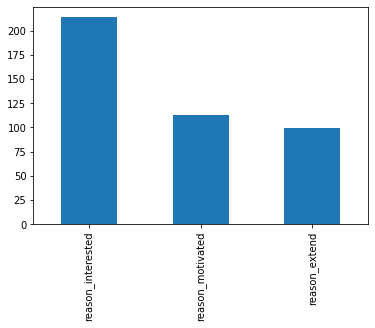

In [ ]:
studyreason['rclus'].value_counts().plot.bar()

###สรุปเรื่อง ความเหตุผลที่อยากเรียน
- แบ่งเป็น 3 กลุ่ม 
1.   กลุ่มที่มีความมุ่งมั่น 
2.   กลุ่มที่อยากจะเพิ่มความรู้ 
3.   กลุ่มที่สนใจ

##3.5 สถานที่เรียน/ทำงาน

In [ ]:
!unzip TH-Sarabun-New.zip

Archive:  TH-Sarabun-New.zip
replace THSarabunNew Bold.ttf? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
dat.columns

Index(['Timestamp', 'สะดวกเรียนช่วงเวลาไหน', 'ชื่อ', 'อายุ', 'อาชีพ',
       'สถานที่ทำงาน/เรียน', 'สาขาที่เรียนจบ / กำลังศึกษา',
       'มีพื้นฐานการเขียนโปรแกรมคอมพิวเตอร์หรือไม่ หากมีโปรดให้ข้อมูล อาทิ ภาษาที่ถนัด ประสบการณ์ในการเขียน',
       'ได้ผ่านการเรียนคลาสอื่น ๆ ของ BOTNOI มาก่อนหรือไม่ ถ้าเคยเรียนคลาสไหนมา',
       'ทำไมถึงสนใจสมัครเรียน', 'ความคาดหวังจากการมาเรียน',
       'กรุณาช่วยระบุว่าได้รับข่าวคลาสเรียนบอทน้อยจากไหน', '',
       'ยืนยันลงทะเบียน', 'ชำระเงิน', 'predictgender', 'predictgender_conf'],
      dtype='object')

In [ ]:
from wordcloud import WordCloud
from collections import Counter

path = '/content/THSarabunNew.ttf'
textList = dat['สถานที่ทำงาน/เรียน'].values
textList = [t.replace('\u200b','') for t in textList]
word_cloud_dict=Counter(textList)
word_cloud_dict

Counter({'-': 7,
         '14/95 ถ.ราษฎร์พัฒนา ซอย 13 เขตสะพานสูง กทม 10240': 1,
         'AA': 1,
         'AGC chemicals': 1,
         'AIResearch': 1,
         'AIS': 1,
         'AIS ภาคตะวันออก': 1,
         'Abac': 1,
         'Advanced Info Services': 1,
         'Agoda': 1,
         'Agoda Service Ltd.': 1,
         'Allianz tech': 1,
         'Appsynth': 1,
         'Ark insight': 1,
         'Ark-insights': 1,
         'Asian Institute of Technology': 1,
         'Asiasoft': 1,
         'Asset World Corp Public Company Limited': 1,
         'At vantage': 1,
         'Atcetera Corp.,Ltd': 1,
         'BEM': 1,
         'BMW Manufacturing Thailand': 1,
         'Bang Trading 1992 Co.,Ltd.': 1,
         'Bangkok Bank': 1,
         'Bangkok Industrial Gas Co.,Ltd.': 1,
         'Bangkok bank': 1,
         'Banpu': 1,
         'Beijing Language and Culture University': 1,
         'Bkk residence': 1,
         'BlueOneTech': 1,
         'Botnoi': 2,
         'Botnoi Consulting': 1,

In [ ]:
word_cloud_dict

Counter({'-': 7,
         '14/95 ถ.ราษฎร์พัฒนา ซอย 13 เขตสะพานสูง กทม 10240': 1,
         'AA': 1,
         'AGC chemicals': 1,
         'AIResearch': 1,
         'AIS': 1,
         'AIS ภาคตะวันออก': 1,
         'Abac': 1,
         'Advanced Info Services': 1,
         'Agoda': 1,
         'Agoda Service Ltd.': 1,
         'Allianz tech': 1,
         'Appsynth': 1,
         'Ark insight': 1,
         'Ark-insights': 1,
         'Asian Institute of Technology': 1,
         'Asiasoft': 1,
         'Asset World Corp Public Company Limited': 1,
         'At vantage': 1,
         'Atcetera Corp.,Ltd': 1,
         'BEM': 1,
         'BMW Manufacturing Thailand': 1,
         'Bang Trading 1992 Co.,Ltd.': 1,
         'Bangkok Bank': 1,
         'Bangkok Industrial Gas Co.,Ltd.': 1,
         'Bangkok bank': 1,
         'Banpu': 1,
         'Beijing Language and Culture University': 1,
         'Bkk residence': 1,
         'BlueOneTech': 1,
         'Botnoi': 2,
         'Botnoi Consulting': 1,

In [ ]:
def genwordcloud(word_cloud_dict,regexp):
  wordcloud = WordCloud(
                        font_path=path, 
                        relative_scaling = 0.3,
                        min_font_size=1,
                        background_color="white",
                        width=1024,
                        height=768,
                        max_words=2000, 
                        colormap='plasma', 
                        scale=3,
                        font_step=4,
                        regexp=regexp,
                      #   contour_width=3, 
                      #   contour_color='steelblue', 
                        collocations=False,
                        margin=2
                        ).generate_from_frequencies(word_cloud_dict)
  import pylab as plt
  fig, ax = plt.subplots(1, 1, figsize=(16, 12))
  ax.imshow(wordcloud, interpolation='bilinear')
  ax.axis("off")
  fig.show()

In [ ]:
def remove_key(word_cloud_dict,keyList):
  wcd = word_cloud_dict.copy()
  kw = list(wcd.keys())
  for w in kw:
    for s in sList: 
      if (w.find(s)!=-1):
        try:
          wcd.pop(w)
        except:
          pass
  return wcd



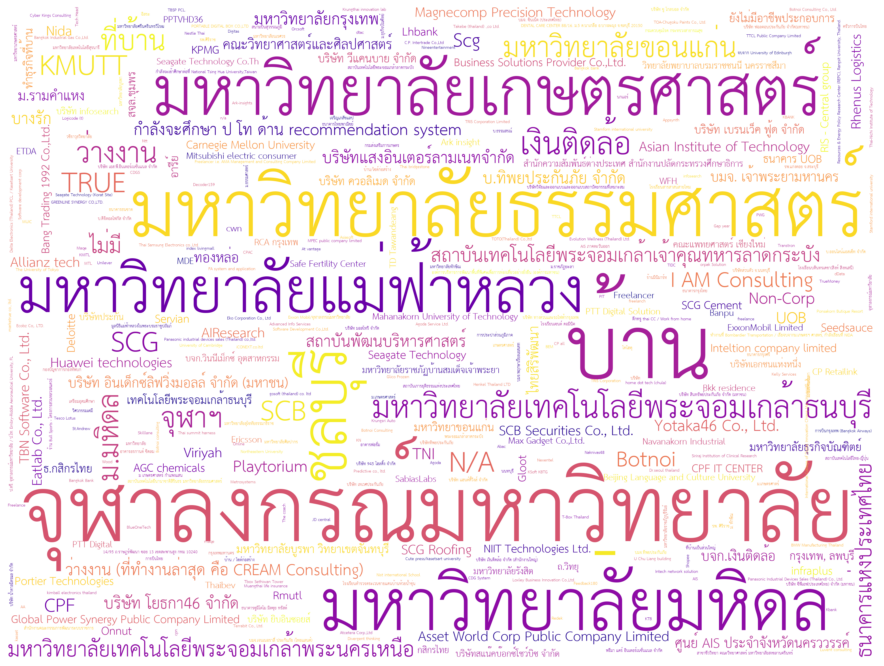

In [ ]:
regexp=r"\w[\w' ]+"
genwordcloud(word_cloud_dict,regexp)

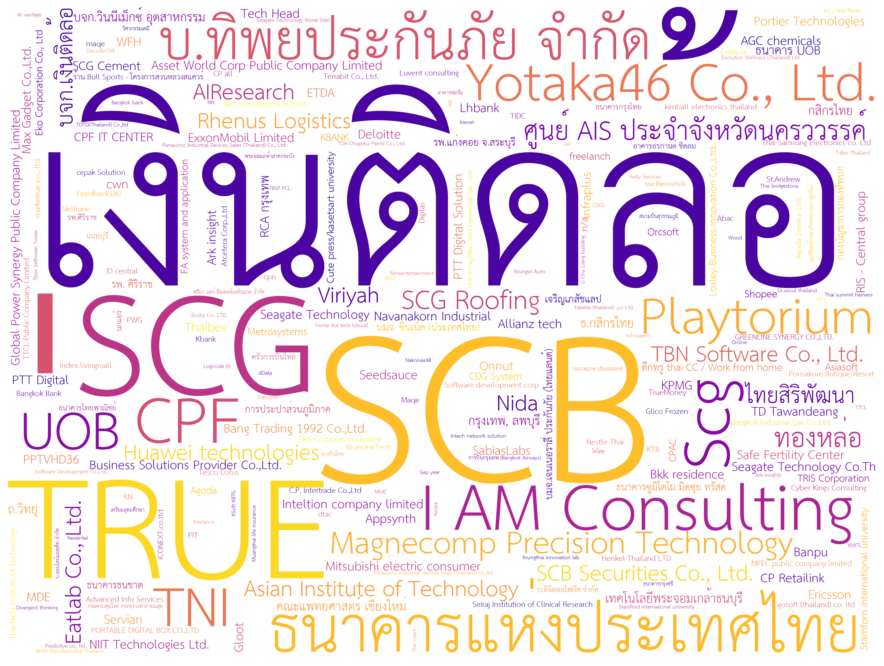

In [ ]:
sList = ['ชลบุรี','ม.','มหา','เกษตร','จุฬา','อารี','ศิลป','บาง','สุขุม','Free','คลอง','สจล','Rmu','กำลัง','Non','บอทน้อย','N/A','Botnoi','ไม่','บริษัท','สถาบัน','Uni','KMUTT','อิสระ','บ้าน','งาน','เรียน','FREE','ธรรม','วิทยา']
wcd = remove_key(word_cloud_dict,sList)
regexp=r"\w[\w' ]+"
genwordcloud(wcd,regexp)

###สรุปเรื่อง สถานที่หน่วยงานที่มาเรียน
- แบ่งเป็น 2 กลุ่มหลัก
1. บริษัทองค์กร ที่มีหลากหลายภาคธุรกิจ
2. มหาวิทยาลัย

##3.6 อาชีพ

In [ ]:
# list อาชีพ ของผู้ที่ผ่านการคัดเลือก
dat['อาชีพ']

0                                         Web programmer
1                                        IT System admin
2                                               นักศึกษา
3      ว่างงาน (พักเบรก) แต่เคยทำงานในบริษัทวิจัยการตลาด
4                                ผู้ดูแลจัดการระบบโรงงาน
5                                               นักศึกษา
6                                           พนักงานเอกชน
7                                           Data Analyst
8                                               นักศึกษา
9                                       นักศึกษาปริญญาโท
13                                          Data science
14                                               Student
15                                   software developers
16                                         เจ้าของธุรกิจ
17                                Implementation Manager
18                                       Software tester
20                                                วิศวกร
21                             

In [ ]:
# หา vector ของแต่ละอาชีพ
import numpy as np
ovec = np.vstack([bw.sentencevector(d) for d in dat['อาชีพ'].values])
ovec

array([[-0.82019216, -0.65802085,  0.05768882, ...,  0.11697551,
         0.23679441,  0.17976974],
       [-0.55609226, -0.84814423, -0.03572075, ...,  0.69647205,
         0.39521828,  0.13402346],
       [-1.4809835 ,  0.64978856,  2.75212717, ...,  0.56286824,
         0.81444758, -0.04740966],
       ...,
       [-0.1838018 ,  0.25972241,  0.62668175, ..., -0.61646062,
         0.03849388, -0.36966732],
       [-2.55488229,  0.86931276,  0.70668602, ...,  0.21100365,
        -1.44400311,  0.68374616],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
# แบ่ง cluster ของกลุ่มอาชีพ ด้วย K-means
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=8, random_state=0).fit(ovec)
ocClus = kmeans.predict(ovec)

In [ ]:
# create dataframe for occupation cluster analysis
occdat = dat[['อาชีพ']]
occdat['กลุ่มอาชีพ'] = ocClus

In [ ]:
# display each occupation cluster
occdat[occdat['กลุ่มอาชีพ']==7]
#['it/data','en','co','ust','pm','st','te','none']

,อาชีพ,กลุ่มอาชีพ
14,Student,7
20,วิศวกร,7
21,วิศวกรสื่อสาร,7
23,ภูมิสถาปนิก,7
37,วิศวกร,7
40,Programmer,7
54,พนักงานบริษัท,7
57,Founder,7
63,พนักงานบริษัท,7
70,วิศวกร,7


In [ ]:
occdat['กลุ่มอาชีพ'] = occdat['กลุ่มอาชีพ'].replace(0,'itanddata')
occdat['กลุ่มอาชีพ'] = occdat['กลุ่มอาชีพ'].replace(1,'engineer')
occdat['กลุ่มอาชีพ'] = occdat['กลุ่มอาชีพ'].replace(2,'corporate')
occdat['กลุ่มอาชีพ'] = occdat['กลุ่มอาชีพ'].replace(3,'unistudent')
occdat['กลุ่มอาชีพ'] = occdat['กลุ่มอาชีพ'].replace(4,'projectmanager')
occdat['กลุ่มอาชีพ'] = occdat['กลุ่มอาชีพ'].replace(5,'schoolstudent')
occdat['กลุ่มอาชีพ'] = occdat['กลุ่มอาชีพ'].replace(6,'teachers/lecturers')
occdat['กลุ่มอาชีพ'] = occdat['กลุ่มอาชีพ'].replace(7,'none')
occdat[occdat['กลุ่มอาชีพ']=='teachers/lecturers']


,อาชีพ,กลุ่มอาชีพ
106,นักเรียน,teachers/lecturers
337,นักเรียน,teachers/lecturers
399,นักเรียน,teachers/lecturers
409,นักเรียน,teachers/lecturers
453,เจ้าหน้าที่โครงการ,teachers/lecturers
642,นักเรียน,teachers/lecturers
666,นักเรียน,teachers/lecturers
753,นักเรียน,teachers/lecturers


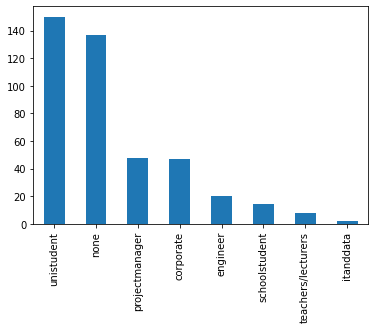

In [ ]:
occdat['กลุ่มอาชีพ'].value_counts().plot.bar()

###สรุปเรื่อง อาชีพ
- การแบ่งกลุ่มอัตโนมัติยังไม่ดีนัก จะเห็นได้ว่ากลุ่มไปกองอยู่ที่ engineer กับ itanddata เป็นหลัก
- อาจจะต้องแบ่งกลุ่มให้เยอะกว่านี้ หรืออาจจะต้องใช้คนมาช่วยแบ่งกลุ่มอาชีพ และใช้ supervise learning ที่จะได้เรียนในคราวถัดไป

##3.7 รวมข้อมูลเพื่อสร้าง DataMart

In [ ]:
dage = datage.reset_index()
pprof = pprofile.reset_index()
exp = expec.reset_index()
studyrea = studyreason.reset_index()
gdat = ndat.reset_index()
ocdat = occdat.reset_index()
datamart = pd.concat([dage[['อายุ']],gdat[['predictgender']],pprof[['prog_clus']],exp[['eclus']],studyrea[['rclus']],ocdat[['กลุ่มอาชีพ']]],axis=1)
datamart

,อายุ,predictgender,prog_clus,eclus,rclus,กลุ่มอาชีพ
0,20-30,male,p_backend,expect_apply,reason_extend,unistudent
1,>40,male,p_data,expect_concept,reason_motivated,unistudent
2,20-30,male,p_noskill,expect_experience,reason_interested,corporate
3,20-30,female,p_fullstack,expect_apply,reason_extend,projectmanager
4,30-40,male,p_noskill,expect_english,reason_motivated,projectmanager
5,<20,female,p_noskill,expect_english,reason_motivated,corporate
6,20-30,male,p_python,expect_concept,reason_interested,engineer
7,30-40,male,p_noskill,expect_english,reason_interested,unistudent
8,20-30,male,p_noskill,expect_concept,reason_interested,corporate
9,20-30,male,p_noskill,expect_apply,reason_interested,projectmanager


# 4. การหาคำตอบจากข้อมูล

##4.1 ความคาดหวังของคนเรียน

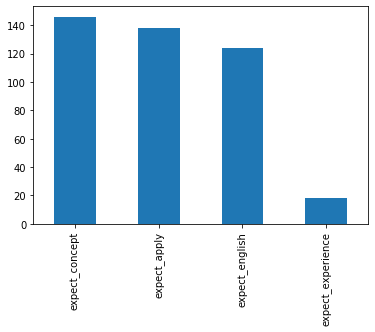

In [ ]:
datamart['eclus'].value_counts().plot.bar()

##4.2 เหตุผลที่เรียน

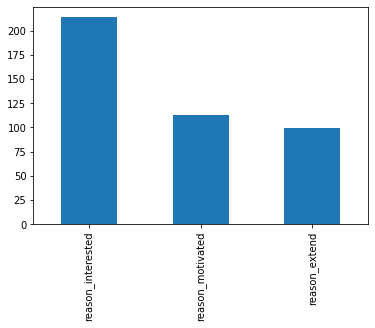

In [ ]:
datamart['rclus'].value_counts().plot.bar()

##4.3 พื้นฐานเขียนโปรแกรม

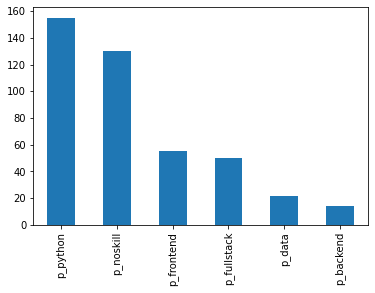

In [ ]:
datamart['prog_clus'].value_counts().plot.bar()

##4.4 ช่วงอายุคนเรียน

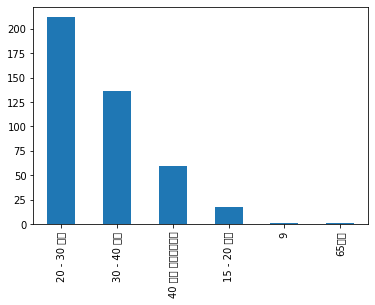

In [ ]:
datamart['อายุ'].value_counts().plot.bar()

##4.5 อาชีพ

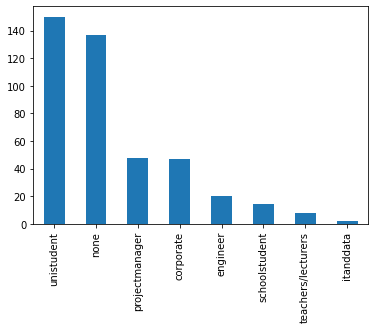

In [ ]:
datamart['กลุ่มอาชีพ'].value_counts().plot.bar()

##สรุป ความสำคัญของการสร้าง data mart
- หากข้อมูลเรามีการอัพเดท เราก็สามารถวิเคราะห์ข้อมูล เทรนใหม่ ได้อย่างรวดเร็ว
- สามารถไปสร้าง dashboard ที่เป็น real-time ก็ได้
- หัวใจของ data analytic อยู่ที่ data mart ทำได้ครบถ้วน แค่ไหน

# 5. ชุดคำถามใหม่หลังจากเห็นผลลัพธ์แรก

In [ ]:
pd.crosstab(datamart['eclus'],datamart['prog_clus'])

In [ ]:
pd.crosstab(datamart['eclus'],datamart['prog_clus'],normalize=0).drop('expect_english')

In [ ]:
pd.crosstab(datamart['eclus'],datamart['prog_clus'],normalize=1).drop('expect_english')

In [ ]:
pd.crosstab(datamart['อายุ'],datamart['prog_clus'])

In [ ]:
pd.crosstab(datamart['อายุ'],datamart['prog_clus'],normalize=1) #ไม่มีประโยชน์ เพราะ 20-30 คนสมัครเยอะ

In [ ]:
datamart['age'] = datamart['อายุ']
ageXprog = pd.crosstab(datamart['age'],datamart['prog_clus'],normalize=0)
ageXprog = ageXprog.T[['<20','20-30','30-40','>40']].T
sns.heatmap(ageXprog, annot=True)

###สรุปผล อายุเทียบกับความสามารถในการเขียนโปรแกรม
- ยิ่งอายุน้อยยิ่งเขียน python ได้ สอดคล้องกับการที่ภาษา python เป็นภาษาที่กำลังเป็นที่นิยม และคนรุ่นใหม่มีโอกาสได้เรียน แต่อยากที่จะได้ฟังประสบการณ์ทำงานในสาย Data Science
- เห็นได้ว่า มีก้อนแบ่งระหว่างคนรู้จัก python กับคนเขียนโปรแกรมไม่ได้ เป็นเรื่องดี ที่จะช่วยในการแบ่งกลุ่มให้เท่า ๆ กัน
- มีผู้ใหญ่ที่อายุมากกว่า 40 ที่เขียนโปรแกรมไม่ได้ คาดว่า น่าจะเป็นกลุ่มผู้บริหาร หรือเจ้าของกิจการ ที่อาจจะสนใจและมีแนวโน้มที่จะจ้างคนรุ่นใหม่ในสาย data ไปช่วย

In [ ]:
pd.crosstab(datamart['กลุ่มอาชีพ'],datamart['prog_clus'],normalize=1)
ageXexpe = pd.crosstab(datamart['age'],datamart['eclus'],normalize=0)
ageXexpe = ageXexpe.T[['<20','20-30','30-40','>40']].T
sns.heatmap(ageXexpe, annot=True)

NameError: ignored

###สรุปผล อายุเทียบกับความคาดหวัง
- ยิ่งอายุน้อยยิ่งต้องการไอเดีย concept ผู้ใหญ่น่าจะเข้าใจ concept ได้ดีกว่า แต่อยากที่จะได้ฟังประสบการณ์ทำงานในสาย Data Science
- การประยุกต์ใช้งาน จะเป็นกลุ่มวัยคนทำงาน

#6. การจัดกลุ่มนักเรียน

In [ ]:
datamart.columns = ['age','gender','prog','expec','reason','occup']

In [ ]:
ddatamart = pd.get_dummies(datamart)

In [ ]:
studentclus = KMeans(n_clusters=20, random_state=0).fit_predict(ddatamart)
ddatamart['studentclus'] = studentclus
clusres = ddatamart.groupby('studentclus').mean().round(1)

In [ ]:
clusres

,age_20-30,age_30-40,age_<20,age_>40,gender_female,gender_male,prog_p_backend,prog_p_data,prog_p_frontend,prog_p_fullstack,prog_p_noskill,prog_p_python,expec_expect_apply,expec_expect_concept,expec_expect_english,expec_expect_experience,reason_reason_extend,reason_reason_interested,reason_reason_motivated,occup_corporate,occup_engineer,occup_itanddata,occup_none,occup_projectmanager,occup_schoolstudent,occup_teachers/lecturers,occup_unistudent
studentclus,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.3,0.4,0.0,0.3,0.1,0.9,0.0,0.1,0.1,0.2,0.1,0.5,0.9,0.0,0.1,0.0,0.0,0.9,0.1,0.0,0.0,0.0,0.0,0.1,0.1,0.0,0.8
1,0.9,0.0,0.1,0.0,0.0,1.0,0.0,0.0,0.2,0.1,0.7,0.0,0.6,0.2,0.1,0.0,0.0,0.7,0.2,0.7,0.1,0.0,0.0,0.1,0.0,0.0,0.1
2,0.2,0.6,0.0,0.2,1.0,0.0,0.0,0.0,0.2,0.2,0.0,0.6,0.0,0.0,1.0,0.0,0.0,0.9,0.1,0.0,0.0,0.0,0.6,0.2,0.0,0.0,0.1
3,0.6,0.3,0.1,0.1,0.9,0.1,0.0,0.0,0.0,0.5,0.1,0.4,1.0,0.0,0.0,0.0,0.1,0.0,0.9,0.0,0.0,0.0,0.2,0.4,0.1,0.1,0.3
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.2,0.1,0.2,0.0,0.5,0.5,0.3,0.0,0.2,0.4,0.0,0.6,0.0,0.0,0.1,0.9,0.0,0.0,0.0,0.0
5,0.0,0.9,0.0,0.1,0.0,1.0,0.1,0.0,0.3,0.1,0.2,0.3,0.0,0.7,0.3,0.0,0.0,1.0,0.0,0.0,0.1,0.0,0.6,0.1,0.1,0.0,0.1
6,0.5,0.3,0.0,0.1,1.0,0.0,0.0,0.0,0.1,0.2,0.2,0.5,0.0,1.0,0.0,0.0,0.0,0.9,0.1,0.1,0.1,0.0,0.3,0.1,0.1,0.0,0.3
7,0.2,0.6,0.1,0.1,0.0,1.0,0.0,0.0,0.0,0.0,0.6,0.4,0.6,0.2,0.0,0.2,1.0,0.0,0.0,0.0,0.0,0.0,0.7,0.1,0.1,0.1,0.0
8,0.7,0.2,0.1,0.0,0.0,1.0,0.0,0.1,0.1,0.1,0.7,0.0,0.0,0.0,0.9,0.1,0.3,0.4,0.3,0.1,0.0,0.0,0.2,0.1,0.0,0.0,0.5


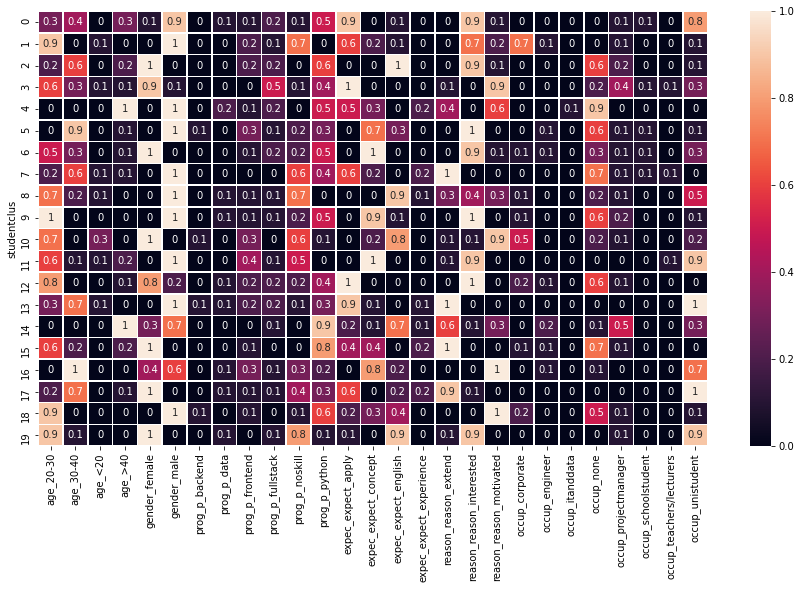

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(clusres, annot=True, linewidths=.5, ax=ax)
#sns.heatmap(clusres, annot=True)

In [ ]:
dat['cluster'] = studentclus
dat[['ยืนยันลงทะเบียน','cluster']]
cList = []
for c in list(set(dat['cluster'])):
  cList.append(dat[dat['cluster']==c])

In [ ]:
def assigngrouptocluster(cluster):
  offset = np.random.randint(20)
  cluster['clusind'] = (np.arange(len(cluster))+offset)%20
  return cluster

datgroup = []
for c in cList:
  datgroup.append(assigngrouptocluster(c))
datgroup = pd.concat(datgroup,axis=0)
datgroup.head()
datgroup['clusind'] = datgroup['clusind'] + 1

In [ ]:
#worksheet(property='index', value=0)
groupsheet = sheet.worksheet(value=1).get_as_df()
groupsheet.columns = ['clusind','GroupName','Link']
datgroup = datgroup.merge(groupsheet,how='left')
datgroup.to_excel('datgroup.xlsx',index=False)
datgroup

,Timestamp,สะดวกเรียนช่วงเวลาไหน,ชื่อ,อายุ,อาชีพ,สถานที่ทำงาน/เรียน,สาขาที่เรียนจบ / กำลังศึกษา,มีพื้นฐานการเขียนโปรแกรมคอมพิวเตอร์หรือไม่ หากมีโปรดให้ข้อมูล อาทิ ภาษาที่ถนัด ประสบการณ์ในการเขียน,ได้ผ่านการเรียนคลาสอื่น ๆ ของ BOTNOI มาก่อนหรือไม่ ถ้าเคยเรียนคลาสไหนมา,ทำไมถึงสนใจสมัครเรียน,ความคาดหวังจากการมาเรียน,กรุณาช่วยระบุว่าได้รับข่าวคลาสเรียนบอทน้อยจากไหน,,ยืนยันลงทะเบียน,ชำระเงิน,predictgender,predictgender_conf,cluster,clusind,GroupName,Link
0,7/18/2020 22:59:01,จันทร์ ถึง ศุกร์ เวลา 18:00 ถึง 21:00,โชติธัช,20 - 30 ปี,Project Manager,Rhenus Logistics,Industrial Management,"โปรแกรม R,Python Basic / PowerBI, Excel",,อยากเรียนพื้นฐาน และ เห็นภาพกว้าง เพื่อสามารถไ...,อยากลงมือทำโปรเจ็คเล็กๆ และ ได้เข้ามาในคอมมูนิ...,,,U06040aa048667e713748234780a8e041,1,ชาย,0.887675,0,14,DSEs_G14,http://line.me/ti/g/bCD-idJrbW
1,7/19/2020 10:37:30,เสาร์ และ อาทิตย์ 09:00 ถึง 12:00,กิตติพงศ์,30 - 40 ปี,Senior Business Research Manager - Investment,Asset World Corp Public Company Limited,Computer Science,"มี, Python; R",,มีความเชื่อมั่นในความรู้ความสามารถของทีมงาน BO...,ไดรับความรู้จากประสบการณ์จริงของทีมงาน BOTNOI,,,Uab47aefc7696b5693e90281813de2c49,1,ชาย,0.944288,0,15,DSEs_G15,http://line.me/ti/g/87koYPgcZl
2,7/19/2020 13:08:16,เสาร์ และ อาทิตย์ 09:00 ถึง 12:00,วรัทภพ,30 - 40 ปี,พัฒนาอสังหาริมทรัพย์,บมจ. เจ้าพระยามหานคร,วิศวกรรมศาสตร์/ การตลาด,Basic python,,เนื้อหาหลักสูตรน่าสนใจ,สามารถนำมาปรับใช้ได้ทันที เช่นมี best practice,,,U361a51602bf4d228cdb301c030fe60e8,1,ชาย,0.777758,0,16,DSEs_G16,https://line.me/R/ti/g/YQFuP_DozC
3,7/19/2020 20:56:41,เสาร์ และ อาทิตย์ 09:00 ถึง 12:00,พิศุทธิ์,30 - 40 ปี,ETL Dev,Inteltion company limited,วิทยาศาสตร์ สถิติ,SQL Python R,Python Fundamental for Data Science module 2,เคยเรียนกับทีม botnoi มาก่อน สอนเข้าใจและทำให้...,ความรู้จากการเขียน python และ การวิเคราะห์จาก ...,,,Ub0da4e3d4e2177e681ba5c13f5048606,1,ชาย,0.803643,0,17,DSEs_G17,https://line.me/R/ti/g/IquUivJMwH
4,7/20/2020 0:43:43,เสาร์ และ อาทิตย์ 09:00 ถึง 12:00,สรกฤช,30 - 40 ปี,พนักงาน บ เอกชน,RIS - Central group,จุฬาลงกรณ์มหาวิทยาลัย,มี ABAP,,สนใจด้าน การทำ data analytic มาใช้ในการทำงาน,เข้าใจ และนำมาใช้งานได้จริง,,,U8e5502fe5a28a786343cf6568c885361,1,ชาย,0.701033,0,18,DSEs_G18,https://line.me/R/ti/g/dsvlnJmdZH
5,7/20/2020 0:55:24,"จันทร์ ถึง ศุกร์ เวลา 18:00 ถึง 21:00, เสาร์ แ...",พิริยะ,30 - 40 ปี,Data Analyst พนักงานบริษัทเอกชน,บริษัท วีแคนบาย จำกัด,จบการศึกษาครุศาสตร์ ดนตรีศึกษา จุฬาลงกรณ์มหาวิ...,ไม่มี แต่กำลังศึกษา Python for Data science อย...,,ต้องการเรียนรู้เพิ่มเติม และเข้าใจแนวคิด ความห...,ต้องการเป็นเรียนรู้เกี่ยวกับ Data science เพื่...,,,Ube083006df43ce7539e68fff46e7024b,1,ชาย,0.864489,0,19,DSEs_G19,https://line.me/R/ti/g/duSQ1UiXXb
6,7/20/2020 13:59:51,เสาร์ และ อาทิตย์ 09:00 ถึง 12:00,ดิษฐพงศ์,40 ปี ขึ้นไป,Lighting Design/Electrical Engineer,ที่บ้าน,วิศวกรรมศาสตร์ไฟฟ้า,มีพื้นฐานในการใช้ภาษาไพทอนในงาน NLP,,ต้องการมีทักษะด้าน ML มากขึ้นเพื่อนำมาประยุกต์...,สามารถเข้าใจและเขียน Code ได้อย่างเป็นขั้นตอน(...,,,U3368d4a04f4f03f25e98a6721c5b6248,1,ชาย,0.915017,0,20,DSEs_G20,https://line.me/R/ti/g/Lj2HNkeAvE
7,7/22/2020 8:46:35,"จันทร์ ถึง ศุกร์ เวลา 18:00 ถึง 21:00, เสาร์ แ...",ไพโรจน์,40 ปี ขึ้นไป,Business analyst,PTT Digital,MIS(IT in business),"SQL, IBM cognos(ETL, model, report), VB6, c#",,ศึกษาเรียนรู้เพิ่มเติม จากคอร์สอื่นๆที่เรียนมา,ได้รู้มากขึ้น อัพเดทความรู้,Facebook กลุ่ม,,Ua1d8e804a008501e869551312da42775,1,ชาย,0.820104,0,1,DSEs_G1,https://line.me/R/ti/g/wzr1A90Sk-
8,7/22/2020 9:40:21,เสาร์ และ อาทิตย์ 09:00 ถึง 12:00,จักริน,30 - 40 ปี,Sr. Analyst,Seagate Technology Co.Th,Computer Engineering,"Java 10 yrs, Python Sr. Project (Bachelor degr...",,AI และ Data Scientist เป็นเรื่องที่น่าสนใจและเ...,มีความรู้ด้าน AI และ Data Scientist มากขึ้น,ครั้งแรก,,Ud2f1496bc161f38af008f74fd1fc1288,1,ชาย,0.869011,0,2,DSEs_G2,https://line.me/R/ti/g/Ag28i4Jrof
9,7/22/2020 9:44:46,เสาร์ และ อาทิตย์ 09:00 ถึง 12:00,ปกรณ์,30 - 40 ปี,Technical​ consultant,บริษัท​ ยิบอินซ​อยส์​,IT,SQL,,เพื่ิอมาเพิ่มความสามารถในการทำงาน,ได้เรียนรู้ขบวนการในการทำงานด้าน​ 

In [ ]:
datgroup.groupby(by='clusid').count()

NameError: ignored

In [ ]:
https://line.me/R/ti/g/wzr1A90Sk-
https://line.me/R/ti/g/Ag28i4Jrof
https://line.me/R/ti/g/WaBVa0KnHN
https://line.me/R/ti/g/8wziQ-7p4T
https://line.me/R/ti/g/gbpNbwigSs
https://line.me/R/ti/g/KGmjNZxQfR
https://line.me/R/ti/g/Nv4fPm8Fuu
https://line.me/R/ti/g/EKKYsOUWr5
https://line.me/R/ti/g/9Nna1439dU
https://line.me/R/ti/g/F26Lr7XVTC
https://line.me/R/ti/g/8ZwZn4Bp1d
https://line.me/R/ti/g/sAJHnyLQP7
https://line.me/R/ti/g/Ehhfnp6ZDh
http://line.me/ti/g/bCD-idJrbW
http://line.me/ti/g/87koYPgcZl
https://line.me/R/ti/g/YQFuP_DozC
https://line.me/R/ti/g/IquUivJMwH
https://line.me/R/ti/g/dsvlnJmdZH
https://line.me/R/ti/g/duSQ1UiXXb
https://line.me/R/ti/g/Lj2HNkeAvE

In [ ]:
np.arange(10)%20

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# 6. สรุป
- data analytic มีความสำคัญอย่างมากในการหา insight เพื่อตอบคำถามทางธุรกิจเบื้องต้น
- ข้อจำกัดของ data analytic คือ การโต้ตอบกับมนุษย์ที่มองเห็นได้มากที่สุดเพียง 3 มิติเท่านั้น 
- เราจะใช้ data science ในการเข้าใจ data ที่เหนือกว่า 3 มิติ รวมถึงการสร้าง AI เพิ่มทำนายผลทางธุรกิจ



---



#backup

In [ ]:
# Concatenate original dataframe with datamart
dat = pd.concat([dat,mydatamart], axis=1)
dat.head()

Gender

In [ ]:
def getGender(text):
  if 'คะ' in text or 'ค่ะ' in text:
    return 'Female'
  return 'Male'
  
dat['Gender'] = dat['ทำไมถึงสนใจสมัครเรียน'].apply(lambda x: getGender(x))

In [ ]:
dat['Gender'].value_counts()

คนที่อยากเปลี่ยนสายงาน

In [ ]:
def wantToChangeCareer(text):
  if 'เปลี่ยนสาย' in text or 'หางาน' in text or 'สนใจ' in text:
    return True
  return False
  
dat['CarrierChange'] = dat['ทำไมถึงสนใจสมัครเรียน'].apply(lambda x: wantToChangeCareer(x))

In [ ]:
dat['CarrierChange'].value_counts()

ได้ข่าวผ่านช่องทางไหน

In [ ]:
def getChannel(text):
  line = ['line', 'botnoi', 'ไลน์', 'บอทน้อย']
  facebook = ['facebook', 'เฟส', 'fb', 'datarockie']
  twitter = ['twitter']

  if any(word in text.lower() for word in line):
    return 'Line'
  elif any(word in text.lower() for word in facebook):
    return 'Fackbook'
  elif any(word in text.lower() for word in twitter):
    return 'Twitter'
  else: 
    return 'N/A'

dat['Channel'] = dat['กรุณาช่วยระบุว่าได้รับข่าวคลาสเรียนบอทน้อยจากไหน'].apply(lambda x: getChannel(x))
dat['Channel']

In [ ]:
sheet = gc.open_by_url('https://docs.google.com/spreadsheets/d/1Pgm51dYB6KfMJGVRseeemh3RR3HJ5bg79mL-lG8hPnU/edit?usp=sharing')

# การวิเคราะห์สำหรับการลงทะเบียน

##รู้ข่าวห้องเรียน Botnoi ผ่านช่องทางไหน

In [ ]:
Channel = pd.DataFrame(dat['Channel'].value_counts())
print(Channel)

i = [0]

def absolute_value(val):
    a  = Channel.iloc[i[0]%len(Channel), i[0]//len(Channel)]
    i[0] += 1
    return a

Channel.plot.pie(subplots=True, figsize=(12, 6), autopct=absolute_value);

##คนสมัครผ่านช่องทางไหน เวลาไหน

In [ ]:
dat[['Date','Time']] = dat['Timestamp'].apply(lambda x: pd.Series(x.split(' ')))
dat['Hour'] = dat.Time.apply(lambda x: x.split(':')[0]).astype(int) 
Channel_Time = pd.crosstab(dat.Hour,dat.Channel, dropna=False)
Channel_Time.plot.bar(figsize=(20,5))

##คนที่อยากมาทำงานด้าน Data Sci

In [ ]:
CarrierChange = pd.DataFrame(dat['CarrierChange'].value_counts())
print(CarrierChange)

i = [0]

def absolute_value(val):
    a  = CarrierChange.iloc[i[0]%len(CarrierChange), i[0]//len(CarrierChange)]
    i[0] += 1
    return a

CarrierChange.plot.pie(subplots=True, figsize=(12, 6), autopct=absolute_value);

##กลุ่มไหนบ้างที่มีความสนใจอยากเปลี่ยนมาทำงานด้าน Data Sci

In [ ]:
WorkCategories_CarrierChange = dat['WorkCategories'].loc[dat['CarrierChange']==True]
sns.heatmap(pd.crosstab(dat['Gender'],WorkCategories_CarrierChange, dropna=False), \
            annot=True, fmt="g", cmap='jet')

##Info ทำไมถึงสนใจสมัครเรียน

In [ ]:
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, STOPWORDS
!gdown --id 1KFeMUzqRNkkOQ3m4oeoorkN4EJGe9JwF

In [ ]:
textList = dat['ทำไมถึงสนใจสมัครเรียน']

textList = ' '.join(textList)
textList

In [ ]:
path = '/content/THSarabunNew Bold.ttf'
stopwords = ["และ","เช่น","ครับ","หรือ","ๆ","อยู่แล้ว","มากขึ้น","ต่างๆ","ได้","ณ","คะ","ด้าน","เป็น","หา","กับ","ด้วย"]

wordcloud = WordCloud(font_path=path,
                      relative_scaling = 0.3,
                      min_font_size=10,
                      background_color="white",
                      width=1277,
                      height=750,
                      regexp=r"[ก-๙a-zA-Z']+",
                      stopwords=stopwords,
                      random_state=1).generate(textList)
plt.figure(figsize = (16, 16))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")